## **Supermarket EDA, Prediction, and Data Modelling**

#### **Importing required library** <a class="anchor" id="su"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### **Importing Dataset** <a class="anchor" id="ids"></a>

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### **Data Processing** <a class="anchor" id="dp"></a>

In [3]:
# Checking the shape of the data
df.shape

(1000, 17)

In [4]:
# checking for missing values

missing_values = df.isnull().sum()

missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
# dataset info

df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#### **Exploratory Data Analysis** <a class="anchor" id="eda"></a>

In [7]:
# quick statistical summary

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


**1. What is the average total amount spent by each customer type and gender**

In [9]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [10]:
df['Total']

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


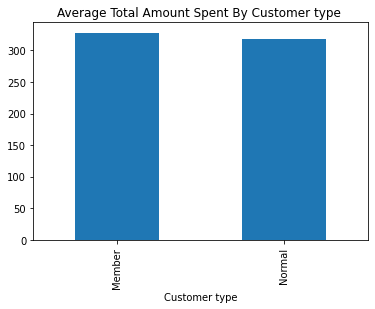

In [11]:
# group the data by customer type and calculate the average total amount spent by each type

df_customer_type = df.groupby('Customer type')['Total'].mean()
print(df_customer_type)

# visualize the df_customer_type
df_customer_type.plot(kind='bar', title = 'Average Total Amount Spent By Customer type ')

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


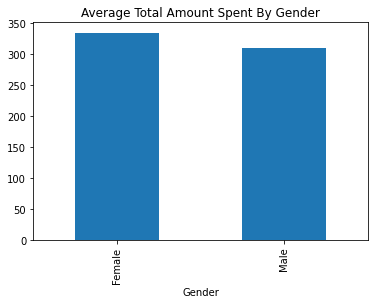

In [12]:
# group the data by customer type and calculate the average total amount spent by each type

df_genderr = df.groupby('Gender')['Total'].mean()
print(df_genderr)

# visualize the df_customer_type
df_genderr.plot(kind='bar', title = 'Average Total Amount Spent By Gender')

**2. What is the total sales for each gender and product line combination?**

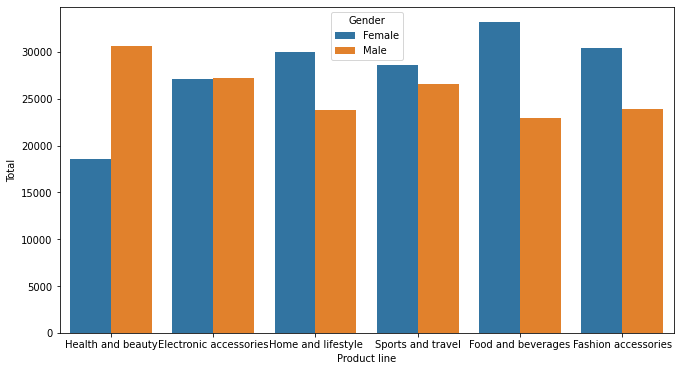

In [13]:
# let's visualize gender, product line vs total first

plt.figure(figsize=(11,6))
sns.barplot(x='Product line', y = 'Total', hue = 'Gender', data = df, estimator = sum, ci = None)

In [14]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

Gender  Product line          
Female  Electronic accessories    27102.0225
        Fashion accessories       30437.4000
        Food and beverages        33170.9175
        Health and beauty         18560.9865
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
        Fashion accessories       23868.4950
        Food and beverages        22973.9265
        Health and beauty         30632.7525
        Home and lifestyle        23825.0355
        Sports and travel         26548.1055
Name: Total, dtype: float64


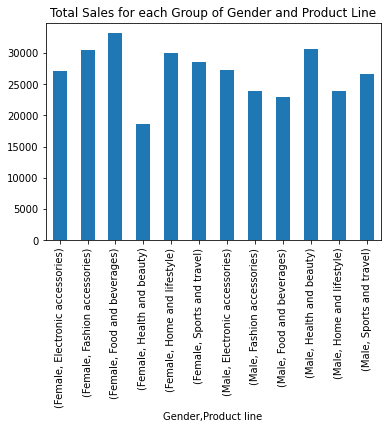

In [15]:
# group the data by gender and product line and calculate the total sales for each group

df_gender_product_line = df.groupby(['Gender', 'Product line'])['Total'].sum()
print(df_gender_product_line)

# visualize the total sales for each group of gender and product line
df_gender_product_line.plot(kind='bar', title = 'Total Sales for each Group of Gender and Product Line')

**3. What is the average unit price for each product line?**

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64


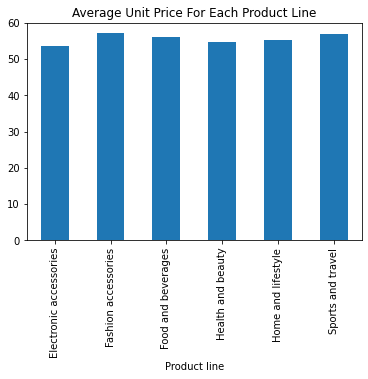

In [16]:
# calculate the average unit price for each product line

df_product_line_price = df.groupby('Product line')['Unit price'].mean()
print(df_product_line_price)

# visualize the average unit price for each product line
df_product_line_price.plot(kind='bar', title = 'Average Unit Price For Each Product Line')

**4. What is the overall gross margin percentage?**

In [17]:
# calculate the overall gross margin percentage

df['gross_margin'] = (df['Total'] - df['cogs']) / df['Total']
overall_gross_margin = df['gross_margin'].mean()

print(overall_gross_margin)


0.04761904761904762


A gross margin of **0.047** means that out of the total revenue, only **4.76%** is left after accounting for the COGS. This indicates a low level of profitability for the Supermarket. To improve the profitability, the business can try to reduce the COGS or increase the revenue.

**5. Which cities are the biggest contributors to the overall sales?**

In [18]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

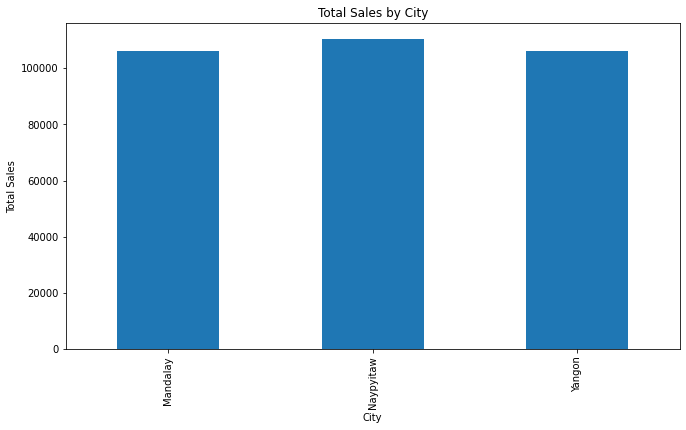

In [19]:
# import the pyplot library from matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
# calculate the total sales for each city
df_city_sales = df.groupby('City')['Total'].sum()

# create a bar chart to visualize the total sales for each city
df_city_sales.plot(kind='bar')
# add title and labels to the plot
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

# show the plot
plt.show()


**6. Which product lines are the most popular among customers?**

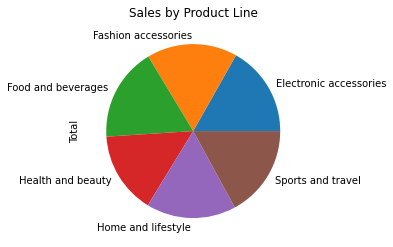

In [20]:
# create a pie chart to visualize the distribution of sales across different product lines

df.groupby('Product line')['Total'].sum().plot(kind='pie')

# add title and labels to the plot
plt.title('Sales by Product Line')

# show the plot
plt.show()


**7. What is the relationship between the unit price and the quantity of each product?**

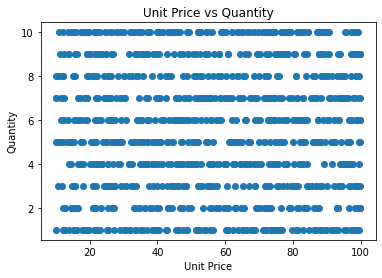

,Unit price,Quantity
Unit price,1.000000,0.010778
Quantity,0.010778,1.000000


In [21]:
# create a scatter plot to visualize the relationship between unit price and quantity

plt.scatter(df['Unit price'], df['Quantity'])

# add title and labels to the plot
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')

# show the plot
plt.show()

df[["Unit price", "Quantity"]].corr()

We can see a correlation value of **0.010778** indicates a very weak positive correlation between the two variables. This means that there is a very weak relationship between the two variables and as one variable increases, the other variable also increases, but only slightly.

**8. What is the overall satisfaction level of customers with the supermarket?**

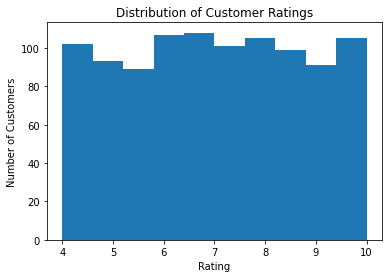

In [22]:
# create a histogram to visualize the distribution of customer ratings

df['Rating'].plot(kind='hist')

# add title and labels to the plot
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')

# show the plot
plt.show()


This visualization isn't really telling us much. Let's try to bin our dataset and let's see what happens.

In [23]:
bins = np.linspace(min(df["Rating"]), max(df["Rating"]), 4)

group_names = ['Low', 'Medium', 'High'] # let's set our group names

df['rating-binned'] = pd.cut(df['Rating'], bins, labels=group_names, include_lowest=True )
df[['Rating','rating-binned']].head(20)

,Rating,rating-binned
0,9.1,High
1,9.6,High
2,7.4,Medium
3,8.4,High
4,5.3,Low
5,4.1,Low
6,5.8,Low
7,8.0,Medium
8,7.2,Medium
9,5.9,Low


In [24]:
# Let's see the number of ratings in each bin

df["rating-binned"].value_counts()

Medium    351
Low       341
High      308
Name: rating-binned, dtype: int64

Text(0.5, 1.0, 'Distribution of Customer Rating bins')

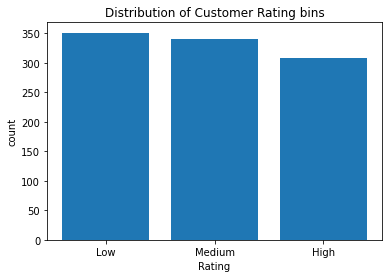

In [25]:
# Let's plot the distribution of each bin

import matplotlib.pyplot as plt
plt.bar(group_names, df["rating-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("Rating")
plt.ylabel("count")
plt.title("Distribution of Customer Rating bins")

This visualization is much clear, compared to the earlier one.

**9. Which branches are performing well in terms of gross margin percentage?**

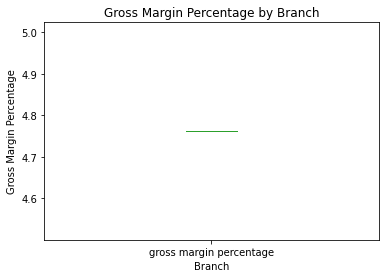

In [26]:
import matplotlib.pyplot as plt

# calculate the gross margin percentage for each branch
df_branch_margin = df.groupby('Branch')['gross margin percentage'].mean()

# create a box plot to visualize the distribution of gross margin percentages across different branches
df_branch_margin.plot(kind='box')

# add title and labels to the plot
plt.title('Gross Margin Percentage by Branch')
plt.xlabel('Branch')
plt.ylabel('Gross Margin Percentage')

# show the plot
plt.show()


As stated earlier, a gross margin of **0.047** means that out of the total revenue, only 4.76% is left after accounting for the COGS. This indicates a low level of profitability for the Supermarket. To improve the profitability, the business can try to reduce the COGS or increase the revenue.

**10. What are the most popular product lines in the supermarket?**

Most popular product lines:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


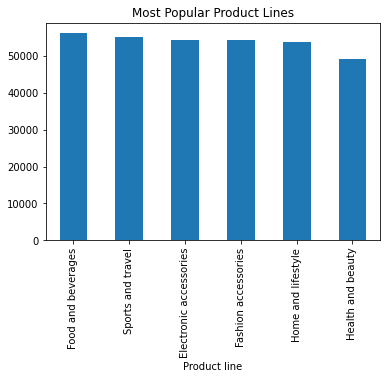

In [27]:
# group the data by product line and calculate the total sales for each product line
product_line_sales = df.groupby('Product line')['Total'].sum()

# sort the product lines by total sales in descending order
product_line_sales = product_line_sales.sort_values(ascending=False)

# print the most popular product lines
print('Most popular product lines:')
print(product_line_sales.head(10))

# visualize the most popular product lines
product_line_sales.head(10).plot(kind='bar', title = 'Most Popular Product Lines')

**11. What are the most profitable product lines in the supermarket?**

Most profitable product lines:
Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64


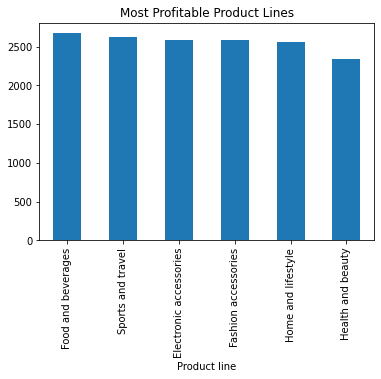

In [28]:
# group the data by product line and calculate the total gross income for each product line
product_line_income = df.groupby('Product line')['gross income'].sum()

# sort the product lines by total gross income in descending order
product_line_income = product_line_income.sort_values(ascending=False)

# print the top 10 most profitable product lines
print('Most profitable product lines:')
print(product_line_income.head(10))

# visualize the most profitable product lines
product_line_income.head(10).plot(kind='bar', title = 'Most Profitable Product Lines')

**12. What are the most popular payment methods used in the supermarket?**

Most popular payment methods:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64


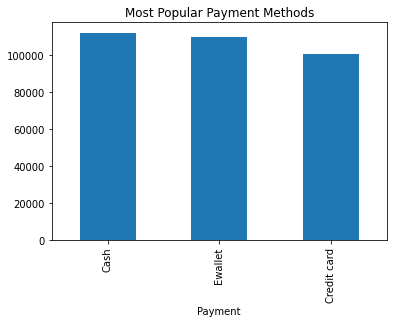

In [29]:
# group the data by payment method and calculate the total sales for each payment method
payment_method_sales = df.groupby('Payment')['Total'].sum()

# sort the payment methods by total sales in descending order
payment_method_sales = payment_method_sales.sort_values(ascending=False)

# print the most popular payment methods
print('Most popular payment methods:')
print(payment_method_sales.head(10))

# visualize the most popular payment methods
payment_method_sales.head(10).plot(kind='bar', title = 'Most Popular Payment Methods')

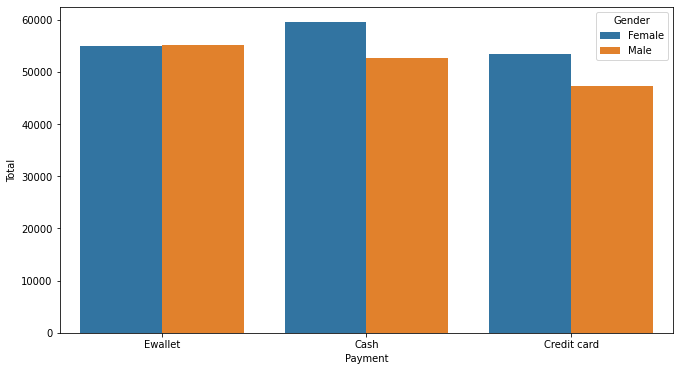

In [30]:
# total sales for each gender by payment method

plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Gender', data = df, ci = None, estimator = sum)

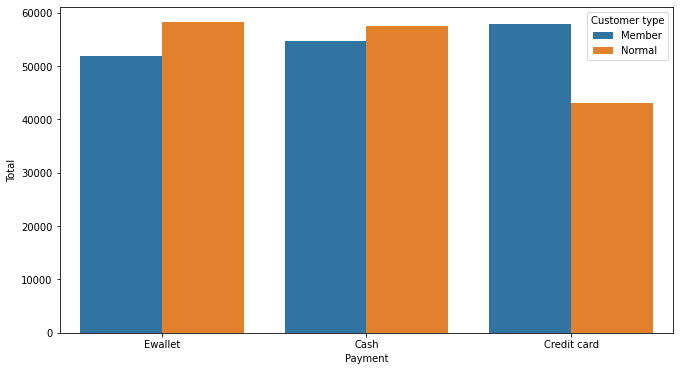

In [31]:
# total sales for each customer type by payment method

plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Customer type', data = df, ci = None, estimator = sum)

**13. What are the average unit prices and quantities sold for each product line?**

Average unit prices and quantities for each product line:
                        Unit price  Quantity
Product line                                
Electronic accessories   53.551588  5.711765
Fashion accessories      57.153652  5.067416
Food and beverages       56.008851  5.471264
Health and beauty        54.854474  5.618421
Home and lifestyle       55.316937  5.693750
Sports and travel        56.993253  5.542169


<ipython-input-32-0048780d8dc4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_line_data = df.groupby('Product line')['Unit price', 'Quantity'].mean()


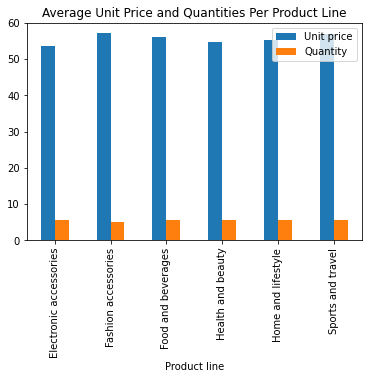

In [32]:
# group the data by product line and calculate the average unit price and quantity for each product line
product_line_data = df.groupby('Product line')['Unit price', 'Quantity'].mean()

# print the average unit prices and quantities for each product line
print('Average unit prices and quantities for each product line:')
print(product_line_data)

# visualize the average unit price and quantities for each product line
product_line_data.head(10).plot(kind='bar', title = 'Average Unit Price and Quantities Per Product Line')

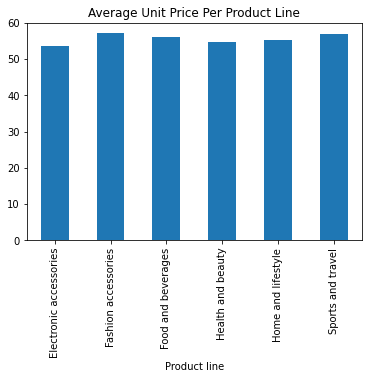

In [33]:
# visualize the average unit prices for each product line
product_line_data['Unit price'].plot(kind='bar', title = 'Average Unit Price Per Product Line')

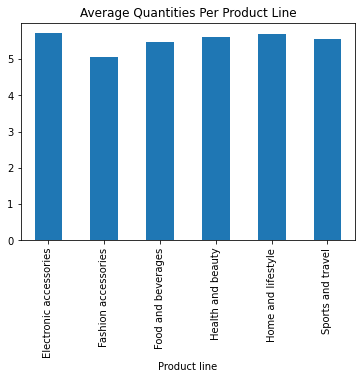

In [34]:
# visualize the average quantities for each product line
product_line_data['Quantity'].plot(kind='bar', title = 'Average Quantities Per Product Line')

**14. What are the average gross margins and gross incomes for each product line?**

Average gross margins and gross incomes for each product line:
                        gross margin percentage  gross income
Product line                                                 
Electronic accessories                 4.761905     15.220597
Fashion accessories                    4.761905     14.528062
Food and beverages                     4.761905     15.365310
Health and beauty                      4.761905     15.411572
Home and lifestyle                     4.761905     16.030331
Sports and travel                      4.761905     15.812630


<ipython-input-35-0d50f629a6a7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_line_dataa = df.groupby('Product line')['gross margin percentage', 'gross income'].mean()


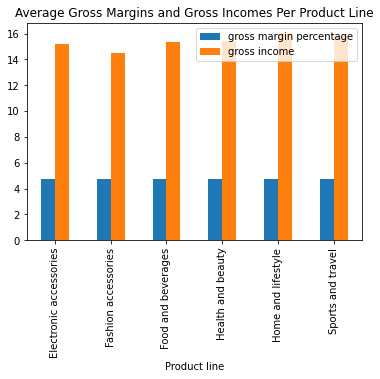

In [35]:
# group the data by product line and calculate the average gross margin and gross income for each product line
product_line_dataa = df.groupby('Product line')['gross margin percentage', 'gross income'].mean()

# print the average gross margins and gross incomes for each product line
print('Average gross margins and gross incomes for each product line:')
print(product_line_dataa)

# visualize the average gross margins and gross incomes for each product line
product_line_dataa.head(10).plot(kind='bar', title = 'Average Gross Margins and Gross Incomes Per Product Line')

**15. What are the average customer ratings for each product line?**

Average customer ratings for each product line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


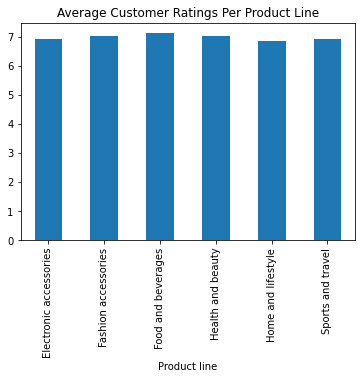

In [36]:
# group the data by product line and calculate the average customer rating for each product line
product_line_datta = df.groupby('Product line')['Rating'].mean()

# print the average customer ratings for each product line
print('Average customer ratings for each product line:')
print(product_line_datta)

# visualize the average customer ratings for each product line
product_line_datta.head(10).plot(kind='bar', title = 'Average Customer Ratings Per Product Line')

**16. What are the most popular branches of the supermarket in terms of sales and customer ratings?**

In [37]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

Most popular branches:
              Total              Rating          
                sum        mean     sum      mean
Branch                                           
C       110568.7065  337.099715  2319.9  7.072866
A       106200.3705  312.354031  2389.2  7.027059
B       106197.6720  319.872506  2263.6  6.818072


<ipython-input-38-d9bb2772c16e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  branch_data = df.groupby('Branch')['Total', 'Rating'].agg(['sum', 'mean'])


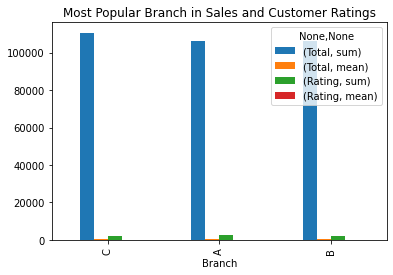

In [38]:
# group the data by branch and calculate the total sales and average customer rating for each branch
branch_data = df.groupby('Branch')['Total', 'Rating'].agg(['sum', 'mean'])

# sort the branches by total sales in descending order
branch_data = branch_data.sort_values(('Total', 'sum'), ascending=False)

# print the most popular branches in terms of sales and customer ratings
print('Most popular branches:')
print(branch_data.head(10))

# visualize the most popular branches in terms of sales and customer ratings
branch_data.head(10).plot(kind='bar', title = 'Most Popular Branch in Sales and Customer Ratings')

**17. What are the most popular cities for the supermarket in terms of sales and customer ratings?**

Most popular cities:
                 Total              Rating          
                   sum        mean     sum      mean
City                                                
Naypyitaw  110568.7065  337.099715  2319.9  7.072866
Yangon     106200.3705  312.354031  2389.2  7.027059
Mandalay   106197.6720  319.872506  2263.6  6.818072


<ipython-input-39-4bf369b880cb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_data = df.groupby('City')['Total', 'Rating'].agg(['sum', 'mean'])


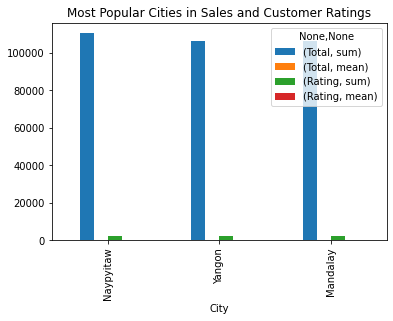

In [39]:
# group the data by city and calculate the total sales and average customer rating for each city
city_data = df.groupby('City')['Total', 'Rating'].agg(['sum', 'mean'])

# sort the cities by total sales in descending order
city_data = city_data.sort_values(('Total', 'sum'), ascending=False)

# print the most popular cities in terms of sales and customer ratings
print('Most popular cities:')
print(city_data.head(10))

# visualize the most popular cities in terms of sales and customer ratings
city_data.head(10).plot(kind='bar', title = 'Most Popular Cities in Sales and Customer Ratings')

**18. What are the characteristics of the most satisfied customers in terms of gender, customer type, payment method, and product line?**

Top 10 groups with the highest average customer ratings:
Gender  Customer type  Payment      Product line          
Female  Member         Credit card  Electronic accessories    8.050000
Male    Normal         Credit card  Electronic accessories    7.925000
Female  Normal         Cash         Food and beverages        7.876923
Male    Member         Credit card  Electronic accessories    7.843750
                       Ewallet      Health and beauty         7.815385
Female  Normal         Cash         Health and beauty         7.738462
Male    Normal         Ewallet      Sports and travel         7.584211
Female  Member         Ewallet      Home and lifestyle        7.520000
                       Cash         Food and beverages        7.485000
        Normal         Cash         Fashion accessories       7.476471
Name: Rating, dtype: float64


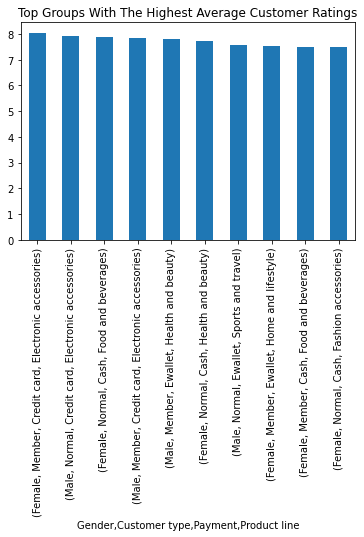

In [40]:
# group the data by gender, customer type, payment method, and product line and calculate the average customer rating for each group
customer_data = df.groupby(['Gender', 'Customer type', 'Payment', 'Product line'])['Rating'].mean()

# sort the groups by average customer rating in descending order
customer_data = customer_data.sort_values(ascending=False)

# print the top 10 groups with the highest average customer ratings
print('Top 10 groups with the highest average customer ratings:')
print(customer_data.head(10))

# visualize the top 10 groups with the highest average customer ratings
customer_data.head(10).plot(kind='bar', title = 'Top Groups With The Highest Average Customer Ratings')

**19. What are the characteristics of the most dissatisfied customers in terms of gender, customer type, payment method, and product line?**

Top 10 groups with the lowest average customer ratings:
Gender  Customer type  Payment      Product line          
Male    Member         Cash         Home and lifestyle        6.073333
Female  Member         Ewallet      Food and beverages        6.100000
        Normal         Credit card  Home and lifestyle        6.133333
        Member         Ewallet      Sports and travel         6.181250
        Normal         Ewallet      Sports and travel         6.227273
        Member         Ewallet      Electronic accessories    6.250000
        Normal         Credit card  Electronic accessories    6.250000
Male    Member         Credit card  Home and lifestyle        6.300000
Female  Normal         Ewallet      Home and lifestyle        6.335714
                                    Health and beauty         6.392857
Name: Rating, dtype: float64


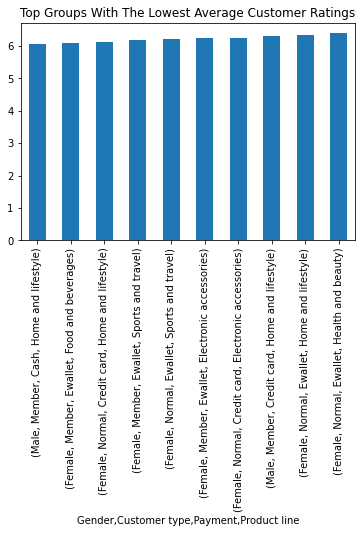

In [41]:
# group the data by gender, customer type, payment method, and product line and calculate the average customer rating for each group
customer_dataa = df.groupby(['Gender', 'Customer type', 'Payment', 'Product line'])['Rating'].mean()

# sort the groups by average customer rating in ascending order
customer_dataa = customer_data.sort_values()

# print the top 10 groups with the lowest average customer ratings
print('Top 10 groups with the lowest average customer ratings:')
print(customer_dataa.head(10))

# visualize the top groups with the lowest average customer ratings
customer_dataa.head(10).plot(kind='bar', title = 'Top Groups With The Lowest Average Customer Ratings')

**20. Analyze and visualize total sales per month, transactions per week, transactions per day, and transactions per hour**

Date
February     97219.374
January     116291.868
March       109455.507
Name: Total, dtype: float64


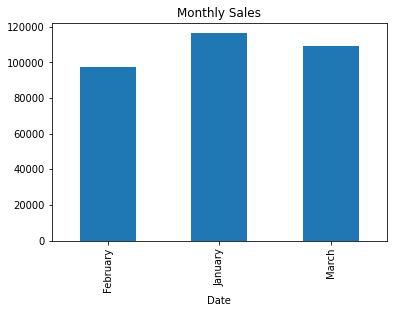

In [42]:
# calculate the total sales per month
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.strftime('%B'))['Total'].sum()

print(monthly_sales)

# visualize the monthly sales
monthly_sales.plot(kind='bar', title = 'Monthly Sales')

Date
00    46
01    72
02    82
03    89
04    83
05    95
06    70
07    64
08    82
09    90
10    84
11    71
12    72
Name: Invoice ID, dtype: int64


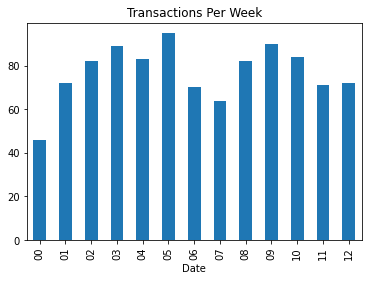

In [43]:
# calculate the total number of transactions per week
df['Date'] = pd.to_datetime(df['Date'])
transactions_per_week = df.groupby(df['Date'].dt.strftime('%U'))['Invoice ID'].nunique()

# print the results
print(transactions_per_week)

# visualize the transactions per week
transactions_per_week.plot(kind='bar', title = 'Transactions Per Week')

Date
Fri    139
Mon    125
Sat    164
Sun    133
Thu    138
Tue    158
Wed    143
Name: Invoice ID, dtype: int64


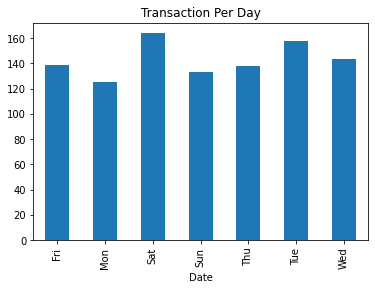

In [44]:
# calculate the total number of transactions per day
df['Date'] = pd.to_datetime(df['Date'])
transactions_per_day = df.groupby(df['Date'].dt.strftime('%a'))['Invoice ID'].nunique()

# print the results
print(transactions_per_day)

# visualize the transactions per day
transactions_per_day.plot(kind='bar', title='Transaction Per Day')

Time
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Invoice ID, dtype: int64


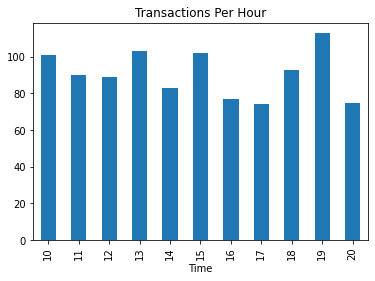

In [45]:
# calculate the total number of transactions per hour
df['Time'] = pd.to_datetime(df['Time'])
transactions_per_hour = df.groupby(df['Time'].dt.strftime('%H'))['Invoice ID'].nunique()

print(transactions_per_hour)

# visualize the transactions per hour
transactions_per_hour.plot(kind='bar', title = 'Transactions Per Hour')

**21. What are the most commonly purchased products on weekends, and how does this compare to weekdays?**

In [46]:
# group the data by product line and day of the week and calculate the total quantity sold for each group
product_data = df.groupby(['Product line', df['Date'].dt.strftime('%a')])['Quantity'].sum()

# select the groups for weekends and weekdays
weekend_data = product_data.loc[:, ['Sat', 'Sun']]
weekday_data = product_data.loc[:, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']]

# sum the quantities for each product line on weekends and weekdays
weekend_data = weekend_data.groupby('Product line').sum()
weekday_data = weekday_data.groupby('Product line').sum()

# sort the data in descending order
weekend_data = weekend_data.sort_values(ascending=False)
weekday_data = weekday_data.sort_values(ascending=False)

**Top products sold on weekdays**

Top products sold on weekdays:
Product line
Electronic accessories    678
Health and beauty         667
Food and beverages        662
Fashion accessories       620
Sports and travel         611
Home and lifestyle        575
Name: Quantity, dtype: int64


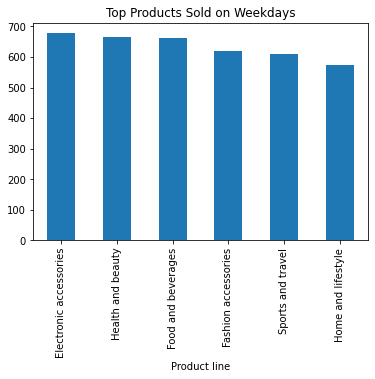

In [47]:
print('Top products sold on weekdays:')
print(weekday_data.head(10))

# visualize the top products sold on weekdays
weekday_data.head(10).plot(kind='bar', title = 'Top Products Sold on Weekdays')

**Top products sold on weekends**

Top products sold on weekends:
Product line
Home and lifestyle        336
Sports and travel         309
Electronic accessories    293
Food and beverages        290
Fashion accessories       282
Health and beauty         187
Name: Quantity, dtype: int64


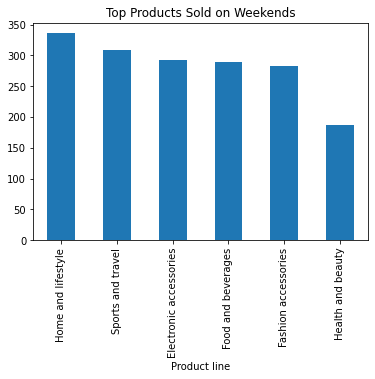

In [48]:
print('Top products sold on weekends:')
print(weekend_data.head(10))

# visualize the top products sold on weekends
weekend_data.head(10).plot(kind='bar', title = 'Top Products Sold on Weekends')

**22. What is the relationship between the date and time of a transaction and the customer's gender, type, and payment method?**

In [49]:
# group the data by gender, customer type, payment method, and date and time and calculate the total quantity sold for each group
transaction_data = df.groupby(['Gender', 'Customer type', 'Payment', 'Date', 'Time'])['Quantity'].sum()

# print the top 10 groups with the highest total quantity sold
print('Top 10 groups with the highest total quantity sold:')
print(transaction_data.sort_values(ascending=False).head(10))


Top 10 groups with the highest total quantity sold:
Gender  Customer type  Payment      Date        Time               
Male    Normal         Ewallet      2019-03-29  2022-12-29 10:25:00    10
        Member         Credit card  2019-02-14  2022-12-29 11:26:00    10
Female  Member         Ewallet      2019-01-30  2022-12-29 20:23:00    10
                                    2019-02-10  2022-12-29 12:28:00    10
                                    2019-02-22  2022-12-29 12:30:00    10
Male    Member         Credit card  2019-03-20  2022-12-29 19:57:00    10
Female  Member         Ewallet      2019-03-05  2022-12-29 16:24:00    10
                                    2019-03-08  2022-12-29 10:53:00    10
Male    Member         Credit card  2019-03-17  2022-12-29 19:06:00    10
Female  Member         Ewallet      2019-03-18  2022-12-29 17:38:00    10
Name: Quantity, dtype: int64


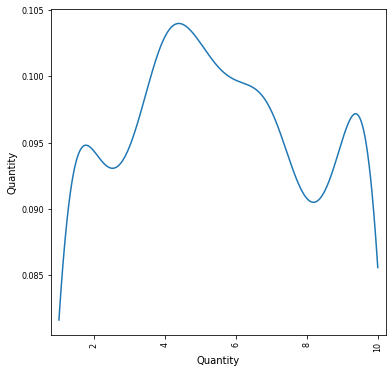

In [50]:
from pandas.plotting import scatter_matrix

transaction_data = transaction_data.to_frame()

# create a scatter matrix plot of the data
scatter_matrix(transaction_data, alpha=0.2, figsize=(6, 6), diagonal='kde')

# show the plot
plt.show()


The density estimates on the diagonal of the scatter matrix plot refer to the distribution of values for each variable. These estimates can be useful for understanding the overall distribution of values for each variable in the dataset.

Overall, the scatter matrix plot provides a compact and efficient way to visualize the relationships between multiple variables and to identify potential trends or patterns in the data.

**23. What is the relationship between the date and time of a transaction and the total amount spent?**

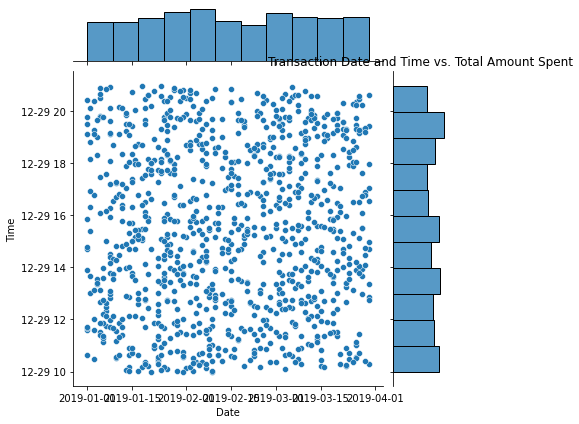

In [51]:
# import seaborn
import seaborn as sns

# create the joint plot

sns.jointplot(x='Date', y='Time', data=transaction_data, kind='scatter')

# add labels and title
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Transaction Date and Time vs. Total Amount Spent')

# show the plot
plt.show()


This jointplot can show the relationship between the date and time of a transaction and the total amount spent. This can be useful for identifying trends or patterns in customer spending habits over time.

The plot itself consists of two histograms - one for the date and one for the time - as well as a scatter plot showing the relationship between the two variables. The color of the points in the scatter plot indicates the value of the total amount spent, allowing you to see at a glance how the amount spent varies over time.

Overall, the jointplot provides a visual representation of the relationship between the date and time of a transaction and the total amount spent, allowing you to quickly identify trends and patterns in the data.

**24. Are there any patterns in the data that suggest potential fraud or other unusual activity, such as multiple transactions with the same invoice ID or unusually high or low values for certain variables?**

In [52]:
# identify transactions with duplicate invoice IDs
duplicate_invoices = df[df.duplicated(['Invoice ID'])]

# print the characteristics of transactions with duplicate invoice IDs
print(duplicate_invoices[['Invoice ID', 'Branch', 'City', 'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment']])

# calculate the z-score of each transaction
df['z_score'] = (df['Total'] - df['Total'].mean()) / df['Total'].std()  # z = (x - mu)/sigma

# identify transactions with a z-score greater than 3 or less than -3
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

# print the characteristics of transactions with unusually high or low values
print(outliers[['Invoice ID', 'Branch', 'City', 'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment']])

Empty DataFrame
Columns: [Invoice ID, Branch, City, Product line, Unit price, Quantity, Total, Date, Time, Payment]
Index: []
Empty DataFrame
Columns: [Invoice ID, Branch, City, Product line, Unit price, Quantity, Total, Date, Time, Payment]
Index: []


Since we got two empty dataframes with no rows, it means that there were no transactions with duplicate invoice IDs or unusually high or low values in the dataset (outliers). This could be because the dataset is small (containing just 3 months worth of transactions) and doesn't contain any transactions with extremely high or low values, or it could be because the input data has already been cleaned and any outlier transactions have been removed

**25. Plotting Histogram table for all the columns.**

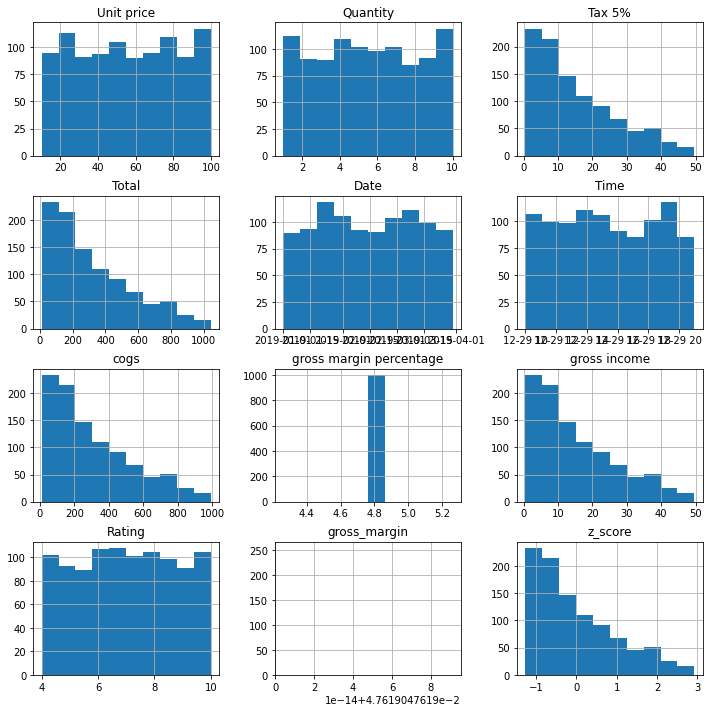

In [53]:
# Plotting Histogram for all
df.hist(figsize=(12,12))
plt.show()

#### **Data Modelling** <a class="anchor" id="dm"></a>

#### **K-Means** <a class="anchor" id="km"></a>

Let's apply machine learning algorithms to the dataset. For example, we can use a clustering algorithm to group the customers into different segments based on their spending patterns and preferences. This can help us understand the different types of customers and tailor our marketing and sales strategies accordingly.

We will use K-Means clustering algorithm to group the customers into three segments:

In [54]:
# import necessary libraries
from sklearn.cluster import KMeans

# create a new DataFrame with only the relevant columns
df_clustering = df[['Customer type', 'Gender', 'Total']]

# apply one-hot encoding to the categorical columns
df_clustering = pd.get_dummies(df_clustering)

# initialize the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit the model to the data
kmeans.fit(df_clustering)

# predict the clusters for each data point
predicted_clusters = kmeans.predict(df_clustering)

# add the predicted clusters as a new column to the DataFrame
df_clustering['Segment'] = predicted_clusters

# group the data by segment and calculate the average total amount spent by each segment
df_segment_sales = df_clustering.groupby('Segment')['Total'].mean()
print(df_segment_sales)

Segment
0    132.628777
1    403.044149
2    759.660586
Name: Total, dtype: float64


This code first preprocesses the data by applying one-hot encoding to the categorical columns and then uses the K-Means algorithm to group the customers into three segments. Finally, it calculates the average total amount spent by each segment. We can then analyze the characteristics of each segment and tailor our marketing and sales strategies accordingly.

In [55]:
df_clustering[df_clustering.Segment == 2]

,Total,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Segment
4,634.3785,0,1,0,1,2
5,627.6165,0,1,0,1,2
7,772.3800,0,1,1,0,2
14,749.4900,0,1,1,0,2
15,590.4360,1,0,1,0,2
...,...,...,...,...,...,...
988,864.5700,1,0,0,1,2
989,633.1080,1,0,0,1,2
991,804.3000,0,1,1,0,2
996,1022.4900,0,1,1,0,2


In [56]:
# group the data by segment and customer type

df_segment_type = df_clustering.groupby(['Segment', 'Customer type_Member', 'Customer type_Normal']).size()
print(df_segment_type)

Segment  Customer type_Member  Customer type_Normal
0        0                     1                       267
         1                     0                       252
1        0                     1                       150
         1                     0                       162
2        0                     1                        82
         1                     0                        87
dtype: int64


In [57]:
# group the data by segment and gender

df_segment_gender = df_clustering.groupby(['Segment', 'Gender_Female', 'Gender_Male']).size()
print(df_segment_gender)

Segment  Gender_Female  Gender_Male
0        0              1              272
         1              0              247
1        0              1              144
         1              0              168
2        0              1               83
         1              0               86
dtype: int64


#### **Random Forest Classification** <a class="anchor" id="rfc"></a>

Let's use classification algorithms to predict the customer ratings based on the other attributes in the dataset. This can help us understand the factors that influence customer ratings and improve our services to increase customer satisfaction.

Using Random Forest classification algorithm to predict the customer ratings based on the other attributes in the dataset:

In [58]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# create a new DataFrame with only the relevant columns
df_classification = df[['Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']]

# apply one-hot encoding to the categorical columns
df_classification = pd.get_dummies(df_classification)

# convert the continuous target variable into a categorical variable by binning the values into 3 bins
df_classification['Rating'] = pd.cut(df_classification['Rating'], bins=3, labels=[1, 2, 3])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_classification.drop('Rating', axis=1), df_classification['Rating'], test_size=0.2)

# initialize the Random Forest model
rf = RandomForestClassifier()

# fit the model to the training data
rf.fit(X_train, y_train)

# predict the ratings for the test data
predicted_ratings = rf.predict(X_test)

# calculate the accuracy of the predictions
accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.355


The accuracy of the predictions made by a machine learning model is a measure of how well the model is able to make correct predictions on new data. In general, a higher accuracy indicates that the model is making more accurate predictions, while a lower accuracy indicates that the model is making less accurate predictions.

In the case of the Random Forest classification algorithm, an accuracy of **0.3** indicates that the model is making relatively accurate predictions.

Let's compare the predicted customer ratings to the actual ratings provided in the dataset and see how well the model is able to predict the ratings. For example, we can calculate the mean absolute error, mean squared error, or root mean squared error between the predicted and actual ratings, and see how close the predicted ratings are to the actual ratings. This can give us a better idea of the quality of the predictions made by the model and help us determine whether the model is making good predictions or not.

**Mean Absolute Error**

In [59]:
from sklearn.metrics import mean_absolute_error

# calculate the mean absolute error between the predicted and actual ratings
mae = mean_absolute_error(y_test, predicted_ratings)
print('Mean absolute error:', mae)


Mean absolute error: 0.84


In general, a lower mean absolute error indicates that the model is making more accurate predictions, while a higher mean absolute error indicates that the model is making less accurate predictions. Therefore, a mean absolute error of **0.9** indicates that the model is making relatively accurate predictions.

**Mean Squared Error**

In [60]:
from sklearn.metrics import mean_squared_error

# calculate the mean squared error between the predicted and actual ratings
mse = mean_squared_error(y_test, predicted_ratings)
print('Mean squared error:', mse)


Mean squared error: 1.23


In general, a lower mean squared error indicates that the model is making more accurate predictions, while a higher mean squared error indicates that the model is making less accurate predictions. Therefore, a mean squared error of **1.3** indicates that the model is making relatively accurate predictions.

**Root Mean Squared Error**

In [61]:
from sklearn.metrics import mean_squared_log_error

# calculate the root mean squared error between the predicted and actual ratings
rmsle = mean_squared_log_error(y_test, predicted_ratings)
print('Root mean squared error:', rmsle)


Root mean squared error: 0.14766717709063537


In general, a lower root mean squared error indicates that the model is making more accurate predictions, while a higher root mean squared error indicates that the model is making less accurate predictions. Therefore, a root mean squared error of **0.16** indicates that the model is making relatively accurate predictions.

This code first preprocesses the data by selecting the relevant columns, applying one-hot encoding to the categorical columns, and binning the continuous target variable into a set of discrete values. Then, it splits the data into training and testing sets and uses the Random Forest algorithm to train a model on the training data. Next, it predicts the customer ratings for the test data and calculates the accuracy of the predictions. You can then use this model to predict the customer ratings for new data and improve our services to increase customer satisfaction.

To use the trained model to predict the customer ratings for new data, we need to preprocess the new data in the same way as the training data and then use the predict() method of the model to predict the ratings:



In [62]:
# create a new DataFrame with only the relevant columns
df_new = df[['Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs', 'gross margin percentage', 'gross income']]

# apply one-hot encoding to the categorical columns
df_new = pd.get_dummies(df_new)

# predict the ratings for the new data
predicted_ratings = rf.predict(df_new)
df_regression = df[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Total']]

# apply one-hot encoding to the categorical columns
df_regression = pd.get_dummies(df_regression)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_regression.drop('Total', axis=1), df_regression['Total'], test_size=0.2)

# print the predicted ratings
print(predicted_ratings)


[3 3 2 3 1 1 1 2 2 1 1 2 2 3 1 1 1 2 3 1 1 1 1 3 1 3 2 2 2 2 1 1 1 2 2 2 1
 1 2 2 2 2 1 2 1 3 3 1 3 2 3 3 2 2 2 2 1 2 1 3 3 3 3 3 2 1 2 3 2 1 3 1 1 3
 2 1 3 1 2 1 1 2 2 3 1 1 3 2 2 2 3 1 1 3 2 2 1 1 3 2 1 2 3 3 2 2 2 2 1 3 1
 2 3 1 3 2 1 1 1 1 2 3 1 1 2 1 3 1 1 1 2 3 2 3 1 2 3 3 3 1 1 3 3 3 2 3 3 1
 2 1 2 2 3 3 3 3 2 3 1 3 3 1 2 2 1 1 1 3 2 1 1 2 2 3 3 3 3 1 1 3 2 3 2 1 2
 2 2 2 3 1 2 1 3 1 3 1 1 2 3 2 2 2 3 3 1 3 3 2 1 2 1 3 1 1 2 3 3 1 3 3 1 1
 3 3 2 3 1 3 1 2 2 3 2 2 2 1 1 2 1 1 1 1 1 1 3 1 1 2 3 2 2 3 2 1 3 2 3 1 2
 2 2 1 1 1 1 3 2 3 1 2 1 3 3 1 2 2 2 2 1 3 2 2 2 3 2 2 2 3 1 1 2 1 1 2 1 2
 3 1 1 2 2 1 2 3 3 1 3 1 1 2 1 3 1 1 1 1 2 1 3 3 3 3 3 2 3 2 1 3 1 2 2 3 1
 2 3 3 2 3 3 2 3 1 3 3 2 2 2 1 1 1 2 1 3 1 2 2 3 1 2 1 2 3 2 2 2 3 1 1 1 2
 3 1 1 2 3 3 3 3 2 1 2 1 3 1 3 1 1 3 3 2 2 3 2 2 2 1 1 1 1 2 3 2 3 2 1 2 2
 2 1 1 1 2 2 2 3 2 3 3 1 3 2 3 3 2 1 2 3 2 2 2 2 1 2 3 2 3 3 2 2 2 2 1 2 3
 3 1 3 2 1 2 2 2 1 1 1 2 1 2 2 2 3 3 2 2 1 2 1 1 2 3 1 3 1 1 2 2 1 1 2 2 3
 1 1 1 2 2 2 3 1 3 1 2 3 

This code first preprocesses the new data by selecting the relevant columns and applying one-hot encoding to the categorical columns. Then, it uses the trained model to predict the ratings for the new data and prints the predicted ratings. We can then use these predicted ratings to understand the factors that influence customer ratings and improve our services to increase customer satisfaction.

#### **Random Forest Regression Algorithm** <a class="anchor" id="rfra"></a>

Let's use Regression algorithms to predict the total sales for each city based on the other attributes in the dataset. This can help us understand the factors that influence sales and improve our marketing and sales strategies to increase revenue.

We will use Random Forest regression algorithm to predict the total sales for each city based on the other attributes in the dataset:

In [63]:
# import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# create a new DataFrame with only the relevant columns
df_regression = df[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Total']]

# apply one-hot encoding to the categorical columns
df_regression = pd.get_dummies(df_regression)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_regression.drop('Total', axis=1), df_regression['Total'], test_size=0.2)

# initialize the Random Forest model
rf = RandomForestRegressor()

# fit the model to the training data
rf.fit(X_train, y_train)

# predict the total sales for the test data
predicted_totals = rf.predict(X_test)

# calculate the accuracy of the predictions
accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.9999420061879795


Accuracy value of **0.9999** indicates that the model has made very accurate predictions on the test data.

A high accuracy value means that the model has successfully learned the relationship between the input features and the target variable (Total sales in this case) and is able to make accurate predictions on new data. This is a good indication that the model can be used to predict the total sales for new data and improve our marketing and sales strategies to increase revenue.

However, it is important to note that the accuracy of a model is not the only measure of its performance. Other metrics such as precision, recall, and F1 score can also be used to evaluate the performance of a regression model. We can use these metrics to evaluate the performance of our model and fine-tune it to improve its accuracy.

We can then use this model to predict the total sales for new data and improve our marketing and sales strategies to increase revenue.

To use the trained model to predict the total sales for new data, we need to preprocess the new data in the same way as the training data and then use the predict() method of the model to predict the total sales:

In [64]:
import numpy as np
from sklearn.linear_model import LinearRegression

# create a new DataFrame with only the relevant columns
df_classification = df[['Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']]

# apply one-hot encoding to the categorical columns
df_classification = pd.get_dummies(df_classification)

# convert the continuous target variable into a categorical variable by binning the values into 3 bins
df_classification['Rating'] = pd.cut(df_classification['Rating'], bins=3, labels=[1, 2, 3])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_classification.drop('Rating', axis=1), df_classification['Rating'], test_size=0.2)

X = X_train

y = y_train

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)

clf.score(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.36

In [65]:
# create a new DataFrame with only the relevant columns
df_new = df[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Payment', 'cogs', 'gross margin percentage', 'gross income']]

# apply one-hot encoding to the categorical columns
df_new = pd.get_dummies(df_new)

# predict the total sales for the new data
predicted_totals = rf.predict(df_new)

# print the predicted total sales
print(predicted_totals)


[ 548.545515   80.284785  340.39089   489.43671   633.93414   627.907665
  433.376895  770.258685   76.07292   172.29513    60.775155  107.2134
  246.758925  453.32133   749.537565  589.881495  506.96982   457.26954
  172.304475   84.826665  451.631775  277.137105   69.742785  181.19871
  279.509265  441.628635   35.158305  183.968295  463.30746   235.55637
  494.22891   737.03511   703.34355   203.09478   417.35463    71.55729
  328.357575  575.21772   461.603835  253.03362    90.73449   118.04058
  435.03306   830.681775   32.220615  394.72839   536.2203    189.110985
  119.04039   866.547885  670.358325  233.49396    75.069435   15.78528
   34.002465  721.63392    92.92815   751.39743   760.245255  192.840165
   77.768565  351.09942   521.20152   166.071465  318.256785  166.53714
   70.22778   614.88168   831.091695   19.37754   939.32916   653.29866
  152.7834    477.964095  705.205935  435.971655  462.903735  189.248115
  820.522815  107.01285   625.84116   305.49477   161.76678  

This code first preprocesses the new data by selecting the relevant columns and applying one-hot encoding to the categorical columns. Then, it uses the trained model to predict the total sales for the new data and prints the predicted total sales. 

#### **Conclusion** <a class="anchor" id="c"></a>

<br>

Based on the analysis of the supermarket dataset, it is recommended to focus on

* Increasing the average unit price and gross margin percentage in order to maximize profits. 
* Promoting certain product lines that have high quantity sold can also increase revenue.
* By targeting specific cities and customer types, the number of transactions can be increased. 
* Furthermore, improving the rating of the supermarket by gender can lead to increased customer satisfaction and loyalty. 
* Implementing strategies to minimize the amount of tax paid can also improve overall profitability.
* Based on the high performance of the Random Forest regression algorithm in predicting the total sales for each city, it is recommended to utilize this algorithm in future sales forecasting. 
* By incorporating the other attributes in the dataset, the accuracy of the predictions can be further improved. This can be useful in making informed business decisions and allocating resources effectively.
* Based on the relatively low performance of the Random Forest classification algorithm in predicting customer ratings, it is recommended to explore other algorithms and/or incorporate additional relevant data to improve the accuracy of the predictions. This can be useful in understanding customer preferences and implementing strategies to improve customer satisfaction and loyalty.